<a href="https://colab.research.google.com/github/bonareri/Financial-Statement-Analysis/blob/main/Financial_Statement_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Financial Analysis

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
# Define the stock symbol (e.g., Apple)
ticker = "AAPL"

# Download financial data
stock = yf.Ticker(ticker)

### Get Financial Statements

####  Income Statement

In [2]:
income_statement = stock.financials
print(income_statement)

                                                        2024-09-30  \
Tax Effect Of Unusual Items                                    0.0   
Tax Rate For Calcs                                           0.241   
Normalized EBITDA                                   134661000000.0   
Net Income From Continuing Operation Net Minori...   93736000000.0   
Reconciled Depreciation                              11445000000.0   
Reconciled Cost Of Revenue                          210352000000.0   
EBITDA                                              134661000000.0   
EBIT                                                123216000000.0   
Net Interest Income                                            NaN   
Interest Expense                                               NaN   
Interest Income                                                NaN   
Normalized Income                                    93736000000.0   
Net Income From Continuing And Discontinued Ope...   93736000000.0   
Total Expenses      

####  Balance Sheet

In [3]:
balance_sheet = stock.balance_sheet
print(balance_sheet)

                                                      2024-09-30  \
Treasury Shares Number                                       NaN   
Ordinary Shares Number                             15116786000.0   
Share Issued                                       15116786000.0   
Net Debt                                           76686000000.0   
Total Debt                                        106629000000.0   
...                                                          ...   
Cash Cash Equivalents And Short Term Investments   65171000000.0   
Other Short Term Investments                       35228000000.0   
Cash And Cash Equivalents                          29943000000.0   
Cash Equivalents                                    2744000000.0   
Cash Financial                                     27199000000.0   

                                                      2023-09-30  \
Treasury Shares Number                                       0.0   
Ordinary Shares Number                         

#### Cash Flow Statement

In [4]:
cash_flow = stock.cashflow
print(cash_flow)

                                                    2024-09-30  \
Free Cash Flow                                  108807000000.0   
Repurchase Of Capital Stock                     -94949000000.0   
Repayment Of Debt                                -9958000000.0   
Issuance Of Debt                                           0.0   
Issuance Of Capital Stock                                  NaN   
Capital Expenditure                              -9447000000.0   
Interest Paid Supplemental Data                            NaN   
Income Tax Paid Supplemental Data                26102000000.0   
End Cash Position                                29943000000.0   
Beginning Cash Position                          30737000000.0   
Changes In Cash                                   -794000000.0   
Financing Cash Flow                            -121983000000.0   
Cash Flow From Continuing Financing Activities -121983000000.0   
Net Other Financing Charges                      -5802000000.0   
Cash Divid

### Key Financial Ratios

#### Market Capitalization, P/E Ratio, and Dividend Yield

In [5]:
market_cap = stock.info['marketCap']
pe_ratio = stock.info['trailingPE']
dividend_yield = stock.info['dividendYield']

print(f"Market Cap: {market_cap}")
print(f"P/E Ratio: {pe_ratio}")
print(f"Dividend Yield: {dividend_yield}")

Market Cap: 3591333740544
P/E Ratio: 37.88748
Dividend Yield: 0.42


### Export Data to Excel for Analysis

In [6]:
# Save financial statements to Excel
with pd.ExcelWriter("financial_statements.xlsx") as writer:
    income_statement.to_excel(writer, sheet_name="Income Statement")
    balance_sheet.to_excel(writer, sheet_name="Balance Sheet")
    cash_flow.to_excel(writer, sheet_name="Cash Flow")

### Load Data

In [72]:
# Load the Excel file and read the required sheets
sheets = pd.read_excel("financial_statements.xlsx", sheet_name=['Income Statement', 'Balance Sheet', 'Cash Flow'])

# Display sheet names
print(xls.sheet_names)

['Income Statement', 'Balance Sheet', 'Cash Flow']


In [73]:
# Extract individual sheets
income_df = sheets['Income Statement']
balance_df = sheets['Balance Sheet']
cash_flow_df = sheets['Cash Flow']

In [77]:
income_df.head()    # View first 5 rows of Income Statement

,Unnamed: 0,2024-09-30 00:00:00,2023-09-30 00:00:00,2022-09-30 00:00:00,2021-09-30 00:00:00,2020-09-30 00:00:00
0,Tax Effect Of Unusual Items,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
1,Tax Rate For Calcs,2.410000e-01,1.470000e-01,1.620000e-01,1.330000e-01,NaN
2,Normalized EBITDA,1.346610e+11,1.258200e+11,1.305410e+11,1.231360e+11,NaN
3,Net Income From Continuing Operation Net Minor...,9.373600e+10,9.699500e+10,9.980300e+10,9.468000e+10,NaN
4,Reconciled Depreciation,1.144500e+10,1.151900e+10,1.110400e+10,1.128400e+10,NaN


In [78]:
balance_df.head()     # View first 5 rows of Balance Sheet

,Unnamed: 0,2024-09-30 00:00:00,2023-09-30 00:00:00,2022-09-30 00:00:00,2021-09-30 00:00:00,2020-09-30 00:00:00
0,Treasury Shares Number,NaN,0.000000e+00,NaN,NaN,NaN
1,Ordinary Shares Number,1.511679e+10,1.555006e+10,1.594342e+10,1.642679e+10,NaN
2,Share Issued,1.511679e+10,1.555006e+10,1.594342e+10,1.642679e+10,NaN
3,Net Debt,7.668600e+10,8.112300e+10,9.642300e+10,8.977900e+10,NaN
4,Total Debt,1.066290e+11,1.110880e+11,1.324800e+11,1.365220e+11,NaN


In [79]:
cash_flow_df.head()   # View first 5 rows of Cash Flow

,Unnamed: 0,2024-09-30 00:00:00,2023-09-30 00:00:00,2022-09-30 00:00:00,2021-09-30 00:00:00,2020-09-30 00:00:00
0,Free Cash Flow,1.088070e+11,9.958400e+10,1.114430e+11,92953000000,NaN
1,Repurchase Of Capital Stock,-9.494900e+10,-7.755000e+10,-8.940200e+10,-85971000000,NaN
2,Repayment Of Debt,-9.958000e+09,-1.115100e+10,-9.543000e+09,-8750000000,NaN
3,Issuance Of Debt,0.000000e+00,5.228000e+09,5.465000e+09,20393000000,NaN
4,Issuance Of Capital Stock,NaN,NaN,NaN,1105000000,880000000.0


In [80]:
print(income_df.info())
print(balance_df.info())
print(cash_flow_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           39 non-null     object 
 1   2024-09-30 00:00:00  33 non-null     float64
 2   2023-09-30 00:00:00  39 non-null     float64
 3   2022-09-30 00:00:00  39 non-null     float64
 4   2021-09-30 00:00:00  39 non-null     float64
 5   2020-09-30 00:00:00  6 non-null      float64
dtypes: float64(5), object(1)
memory usage: 2.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           68 non-null     object 
 1   2024-09-30 00:00:00  62 non-null     float64
 2   2023-09-30 00:00:00  67 non-null     float64
 3   2022-09-30 00:00:00  67 non-null     float64
 4   2021-09-30 00:00:00  63 non-null  

### Key Observations from:
- Column Naming Issues: The first column (Unnamed: 0) should be renamed to "Metric" for better readability.
- Date Formatting: The column names are datetime objects. They should be formatted as years (e.g., 2024, 2023, etc.).

Missing Values:
- The 2020 column has very few non-null values across all sheets. It might not be useful and could be removed.
Other columns (e.g., 2024-09-30 00:00:00) have some missing values.

## Data Cleaning

In [85]:
# Rename first column if it exists
for df in [income_df, balance_df, cash_flow_df]:
    if df.columns[0].startswith('Unnamed'):  # Ensures we only rename if it's unnamed
        df.rename(columns={df.columns[0]: 'Metric'}, inplace=True)

# Convert datetime columns to year format
for df in [income_df, balance_df, cash_flow_df]:
    df.columns = [str(pd.to_datetime(col).year) if '00:00:00' in str(col) else col for col in df.columns]

# Drop the 2020 column if it has too many missing values
for df in [income_df, balance_df, cash_flow_df]:
    if '2020' in df.columns and df['2020'].count() < len(df) * 0.2:  # Less than 20% filled
        df.drop(columns=['2020'], inplace=True)

# Check the updated column names
print(income_df.head())
print(balance_df.head())
print(cash_flow_df.head())

                                              Metric          2024  \
0                        Tax Effect Of Unusual Items  0.000000e+00   
1                                 Tax Rate For Calcs  2.410000e-01   
2                                  Normalized EBITDA  1.346610e+11   
3  Net Income From Continuing Operation Net Minor...  9.373600e+10   
4                            Reconciled Depreciation  1.144500e+10   

           2023          2022          2021  
0  0.000000e+00  0.000000e+00  0.000000e+00  
1  1.470000e-01  1.620000e-01  1.330000e-01  
2  1.258200e+11  1.305410e+11  1.231360e+11  
3  9.699500e+10  9.980300e+10  9.468000e+10  
4  1.151900e+10  1.110400e+10  1.128400e+10  
                   Metric          2024          2023          2022  \
0  Treasury Shares Number           NaN  0.000000e+00           NaN   
1  Ordinary Shares Number  1.511679e+10  1.555006e+10  1.594342e+10   
2            Share Issued  1.511679e+10  1.555006e+10  1.594342e+10   
3                Ne

In [86]:
print(income_df.info())
print(balance_df.info())
print(cash_flow_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Metric  39 non-null     object 
 1   2024    33 non-null     float64
 2   2023    39 non-null     float64
 3   2022    39 non-null     float64
 4   2021    39 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Metric  68 non-null     object 
 1   2024    62 non-null     float64
 2   2023    67 non-null     float64
 3   2022    67 non-null     float64
 4   2021    63 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  ------------

In [87]:
# Display rows with missing values for each sheet
print("Rows with missing values in Income Statement:")
print(income_df[income_df.isnull().any(axis=1)])

print("\nRows with missing values in Balance Sheet:")
print(balance_df[balance_df.isnull().any(axis=1)])

print("\nRows with missing values in Cash Flow:")
print(cash_flow_df[cash_flow_df.isnull().any(axis=1)])

Rows with missing values in Income Statement:
                                       Metric  2024          2023  \
8                         Net Interest Income   NaN -1.830000e+08   
9                            Interest Expense   NaN  3.933000e+09   
10                            Interest Income   NaN  3.750000e+09   
28  Net Non Operating Interest Income Expense   NaN -1.830000e+08   
29             Interest Expense Non Operating   NaN  3.933000e+09   
30              Interest Income Non Operating   NaN  3.750000e+09   

            2022          2021  
8  -1.060000e+08  1.980000e+08  
9   2.931000e+09  2.645000e+09  
10  2.825000e+09  2.843000e+09  
28 -1.060000e+08  1.980000e+08  
29  2.931000e+09  2.645000e+09  
30  2.825000e+09  2.843000e+09  

Rows with missing values in Balance Sheet:
                                Metric          2024          2023  \
0               Treasury Shares Number           NaN  0.000000e+00   
9            Capital Lease Obligations           NaN  1

### Handling Missing Values in Financial Statements

#### 1. Income Statement

- The missing values in 2024 exist while past years have data.
- To maintain consistency, I will use forward fill (ffill) for missing values in 2024, assuming continuity.
- If a forward fill is not applicable, I will use mean imputation based on previous years.

In [89]:
income_df['2024'] = income_df['2024'].ffill()

In [90]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Metric  39 non-null     object 
 1   2024    39 non-null     float64
 2   2023    39 non-null     float64
 3   2022    39 non-null     float64
 4   2021    39 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.7+ KB


#### 2. Balance Sheet

- Some columns (e.g., Treasury Shares Number, Other Investments) have missing values across multiple years. These will be dropped if irrelevant.
- Missing values for Capital Lease Obligations & Tax Payables (2024) will be forward filled from 2023.
- Non-Current Deferred Assets & Taxes are missing in 2021 but available in later years. These will be backward filled to ensure continuity.

In [96]:
print(balance_df.columns)

Index(['Metric', '2024', '2023', '2022', '2021'], dtype='object')


In [97]:
print(balance_df['Metric'].unique())

['Treasury Shares Number' 'Ordinary Shares Number' 'Share Issued'
 'Net Debt' 'Total Debt' 'Tangible Book Value' 'Invested Capital'
 'Working Capital' 'Net Tangible Assets' 'Capital Lease Obligations'
 'Common Stock Equity' 'Total Capitalization'
 'Total Equity Gross Minority Interest' 'Stockholders Equity'
 'Gains Losses Not Affecting Retained Earnings' 'Other Equity Adjustments'
 'Retained Earnings' 'Capital Stock' 'Common Stock'
 'Total Liabilities Net Minority Interest'
 'Total Non Current Liabilities Net Minority Interest'
 'Other Non Current Liabilities' 'Tradeand Other Payables Non Current'
 'Long Term Debt And Capital Lease Obligation'
 'Long Term Capital Lease Obligation' 'Long Term Debt'
 'Current Liabilities' 'Other Current Liabilities'
 'Current Deferred Liabilities' 'Current Deferred Revenue'
 'Current Debt And Capital Lease Obligation'
 'Current Capital Lease Obligation' 'Current Debt'
 'Other Current Borrowings' 'Commercial Paper'
 'Payables And Accrued Expenses' 'Payabl

In [98]:
# Define rows to forward-fill for 2024
rows_to_ffill = ['Capital Lease Obligations', 'Total Tax Payable', 'Income Tax Payable']

for row in rows_to_ffill:
    balance_df.loc[balance_df['Metric'] == row, '2024'] = (
        balance_df.loc[balance_df['Metric'] == row, '2024'].ffill(axis=0)
    )

In [99]:
balance_df = balance_df[~balance_df['Metric'].isin(['Treasury Shares Number'])]

In [100]:
balance_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, 1 to 67
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Metric  67 non-null     object 
 1   2024    62 non-null     float64
 2   2023    66 non-null     float64
 3   2022    67 non-null     float64
 4   2021    63 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.1+ KB


In [101]:
missing_rows = balance_df[balance_df.isnull().any(axis=1)]
print(missing_rows)

                                Metric          2024          2023  \
9            Capital Lease Obligations           NaN  1.284200e+10   
24  Long Term Capital Lease Obligation           NaN  1.126700e+10   
31    Current Capital Lease Obligation           NaN  1.575000e+09   
37                   Total Tax Payable  2.660100e+10  8.819000e+09   
38                  Income Tax Payable  2.660100e+10  8.819000e+09   
43         Non Current Deferred Assets  1.949900e+10  1.785200e+10   
44   Non Current Deferred Taxes Assets  1.949900e+10  1.785200e+10   
46                   Other Investments           NaN           NaN   
53                    Other Properties           NaN  1.066100e+10   

            2022          2021  
9   1.241100e+10  1.180300e+10  
24  1.074800e+10  1.027500e+10  
31  1.663000e+09  1.528000e+09  
37  6.552000e+09           NaN  
38  6.552000e+09           NaN  
43  1.537500e+10           NaN  
44  1.537500e+10           NaN  
46  1.208050e+11  1.278770e+11  
53

In [102]:
# Forward Fill for missing 2024 values using 2023
columns_to_ffill = ['Capital Lease Obligations', 'Long Term Capital Lease Obligation',
                    'Current Capital Lease Obligation', 'Total Tax Payable', 'Income Tax Payable']

balance_df.loc[balance_df['Metric'].isin(columns_to_ffill), '2024'] = (
    balance_df.loc[balance_df['Metric'].isin(columns_to_ffill), '2024']
    .fillna(balance_df['2023'])
)

# Backward Fill for Non Current Deferred Assets & Taxes
columns_to_bfill = ['Non Current Deferred Assets', 'Non Current Deferred Taxes Assets']
balance_df.loc[balance_df['Metric'].isin(columns_to_bfill), '2021'] = (
    balance_df.loc[balance_df['Metric'].isin(columns_to_bfill), '2021']
    .fillna(balance_df['2022'])
)

# Drop "Other Investments" if it's mostly missing
balance_df = balance_df[balance_df['Metric'] != 'Other Investments']

# Print cleaned data
print(balance_df.loc[balance_df.isnull().any(axis=1)])  # Check if any missing values remain

                Metric          2024          2023          2022          2021
37   Total Tax Payable  2.660100e+10  8.819000e+09  6.552000e+09           NaN
38  Income Tax Payable  2.660100e+10  8.819000e+09  6.552000e+09           NaN
53    Other Properties           NaN  1.066100e+10  1.041700e+10  1.008700e+10


In [103]:
# Backfill missing 2021 values for Tax Payables
tax_columns = ['Total Tax Payable', 'Income Tax Payable']
balance_df.loc[balance_df['Metric'].isin(tax_columns), '2021'] = (
    balance_df.loc[balance_df['Metric'].isin(tax_columns), '2021']
    .fillna(balance_df['2022'])
)

# Forward fill for Other Properties in 2024
balance_df.loc[balance_df['Metric'] == 'Other Properties', '2024'] = (
    balance_df.loc[balance_df['Metric'] == 'Other Properties', '2024']
    .fillna(balance_df['2023'])
)

# Check if missing values remain
print(balance_df.loc[balance_df.isnull().any(axis=1)])

Empty DataFrame
Columns: [Metric, 2024, 2023, 2022, 2021]
Index: []


In [104]:
balance_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66 entries, 1 to 67
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Metric  66 non-null     object 
 1   2024    66 non-null     float64
 2   2023    66 non-null     float64
 3   2022    66 non-null     float64
 4   2021    66 non-null     float64
dtypes: float64(4), object(1)
memory usage: 5.1+ KB


#### 3. Cash Flow Statement

- Some missing values (e.g., Stock Issuance, Business Purchases, Deferred Taxes) are highly variable and do not occur every year.
- For these, I will fill missing values with 0, assuming no transaction happened.
- For 2024-specific missing values, I will use forward fill from 2023 where trends exist.

In [106]:
# Display rows with any missing values
missing_values_df = cash_flow_df[cash_flow_df.isnull().any(axis=1)]
print(missing_values_df)

                             Metric  2024          2023          2022  \
4         Issuance Of Capital Stock   NaN           NaN           NaN   
6   Interest Paid Supplemental Data   NaN  3.803000e+09  2.865000e+09   
18            Common Stock Issuance   NaN           NaN           NaN   
30   Net Business Purchase And Sale   NaN           NaN -3.060000e+08   
31             Purchase Of Business   NaN           NaN -3.060000e+08   
37  Change In Other Working Capital   NaN           NaN  4.780000e+08   
48                     Deferred Tax   NaN           NaN  8.950000e+08   
49              Deferred Income Tax   NaN           NaN  8.950000e+08   

          2021  
4   1105000000  
6   2687000000  
18  1105000000  
30   -33000000  
31   -33000000  
37  1676000000  
48 -4774000000  
49 -4774000000  


In [110]:
# Fill missing values with 0 where transactions do not occur every year
cash_flow_df.fillna(0, inplace=True)

# Forward fill only for the 2024 column where trends exist
cash_flow_df['2024'] = cash_flow_df['2024'].replace(0, np.nan).ffill()

In [113]:
cash_flow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Metric  53 non-null     object 
 1   2024    53 non-null     float64
 2   2023    53 non-null     float64
 3   2022    53 non-null     float64
 4   2021    53 non-null     int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 2.2+ KB


In [114]:
#save cleaned data
with pd.ExcelWriter("cleaned_financial_statements.xlsx") as writer:
    income_df.to_excel(writer, sheet_name="Income Statement")
    balance_df.to_excel(writer, sheet_name="Balance Sheet")
    cash_flow_df.to_excel(writer, sheet_name="Cash Flow")

## Financial Metrics & Ratios

### a) Liquidity Ratios (Short-term financial health)
These measure the company's ability to cover short-term liabilities.

1.  Current Ratio = Current Assets / Current Liabilities
- Interpretation: If the ratio is >1, the company can cover short-term debts.

In [116]:
current_assets = balance_df.loc[balance_df['Metric'] == 'Current Assets', '2024'].values[0]
current_liabilities = balance_df.loc[balance_df['Metric'] == 'Current Liabilities', '2024'].values[0]

current_ratio = current_assets / current_liabilities
print(f"Current Ratio (2024): {current_ratio:.2f}")

Current Ratio (2024): 0.87


#### 📉 Interpretation of 2024's Current Ratio (0.87)
- A **current ratio below 1.0** (like **0.87**) suggests that the company **may struggle to meet short-term obligations** with its available assets.  
- This could indicate **liquidity issues**, meaning the company might need **external financing** or better **cash flow management**.  
- Investors and creditors might see this as a **red flag** unless the company has **strong cash flows or access to credit**.

#### 🔍 Possible Reasons for a Low Current Ratio  
1. **High Short-Term Liabilities** – The company may have taken on **more short-term debt** than it can currently cover.  
2. **Low Cash Reserves** – Insufficient cash or liquid assets could make it harder to pay short-term obligations.  
3. **Inventory or Accounts Receivable Issues** – If a large portion of current assets is tied up in inventory or pending receivables, liquidity could be constrained.  
4. **Aggressive Growth Strategy** – The company may be **investing heavily** in expansion, reducing available liquid assets.

#### 2. Quick Ratio

The **quick ratio** (or **acid-test ratio**) measures a company's ability to meet its **short-term liabilities** using its **most liquid assets**—excluding inventory. It is calculated as:

\[
\text{Quick Ratio} = \frac{\text{Current Assets} - \text{Inventory}}{\text{Current Liabilities}}
\]


In [117]:
inventory = balance_df.loc[balance_df['Metric'] == 'Inventory', '2024'].values[0]

quick_ratio = (current_assets - inventory) / current_liabilities
print(f"Quick Ratio (2024): {quick_ratio:.2f}")

Quick Ratio (2024): 0.83


#### 📉 Interpretation of 2024's Quick Ratio (0.83)  
- A **quick ratio of 0.83** means that for every **\$1 of short-term liabilities**, the company has **$0.83 of liquid assets** to cover them.  
- Since the **ratio is below 1.0**, it suggests that the company may face **liquidity challenges** if it needs to pay off its obligations quickly.  
- The company's reliance on **inventory** to meet short-term liabilities could be risky, especially if inventory turnover is slow.

#### 🔍 Possible Reasons for a Low Quick Ratio
1. **Low Cash & Receivables** – The company may not have enough **cash or accounts receivable** available for immediate use.  
2. **High Inventory Levels** – If too much capital is tied up in **unsold inventory**, it reduces the quick ratio.  
3. **Short-Term Debt Obligations** – A high amount of **short-term liabilities** could be outpacing liquid asset growth.  
4. **Delayed Receivables Collection** – If customers take too long to pay, it affects liquidity.  

#### 📌 Strategies to Improve the Quick Ratio
✅ **Increase Cash Reserves** – Improve **cash flow management** to maintain sufficient liquidity.  
✅ **Reduce Short-Term Liabilities** – Consider restructuring debt or delaying non-essential expenses.  
✅ **Speed Up Receivables Collection** – Implement **stricter credit policies** and encourage early payments.  
✅ **Optimize Inventory Management** – Reduce **excess stock** and improve turnover rates.

### b) Profitability Ratios (Earnings Performance)
These evaluate how well a company generates profit.

1️⃣ Gross Profit Margin = (Revenue - Cost of Goods Sold) / Revenue

- The **gross profit margin** measures how efficiently a company generates profit from its core operations after deducting the **cost of goods sold (COGS)**.

In [120]:
revenue = income_df.loc[income_df['Metric'] == 'Total Revenue', '2024'].values[0]
cogs = income_df.loc[income_df['Metric'] == 'Cost Of Revenue', '2024'].values[0]

gross_profit_margin = (revenue - cogs) / revenue
print(f"Gross Profit Margin (2024): {gross_profit_margin:.2%}")

Gross Profit Margin (2024): 46.21%


#### 📈 Interpretation of 2024's Gross Profit Margin (46.21%)  
- A **gross profit margin of 46.21%** means that **for every \$1 of revenue, the company retains $0.46 as gross profit** after covering direct production costs.  
- This indicates a **healthy profitability level**, suggesting **strong pricing power** and **cost management**.  
- A margin **above 40%** is generally considered strong, but this depends on industry standards.

#### 🔍 Factors Affecting Gross Profit Margin  
1. **Efficient Cost Control** – Lower production costs or better supplier negotiations can improve margins.  
2. **Pricing Strategy** – Higher pricing power increases margins, while discounts or promotions can reduce them.  
3. **Sales Mix** – Selling more high-margin products improves overall gross profit margin.  
4. **Raw Material Costs** – Rising material costs can **shrink margins** if prices aren't adjusted accordingly.  
5. **Economies of Scale** – Larger production volumes can reduce unit costs, improving profitability.  

####📌 How to Improve Gross Profit Margin  
✅ **Optimize Production Costs** – Improve **supply chain efficiency** and negotiate better supplier deals.  
✅ **Increase Pricing Strategically** – Adjust product pricing based on **customer demand and competition**.  
✅ **Focus on High-Margin Products** – Shift sales efforts toward more profitable product lines.  
✅ **Reduce Waste & Inefficiencies** – Streamline **manufacturing processes** to cut unnecessary costs.  

**💡 Key Takeaway**  
A **46.21% gross profit margin** is a **strong indicator of operational efficiency**, but maintaining or increasing it requires **cost management, pricing strategies, and continuous process improvements**.

2️⃣ Net Profit Margin = Net Income / Revenue

 - The **net profit margin** measures how much of a company’s total revenue translates into **actual profit** after deducting **all expenses**, including operating costs, taxes, interest, and other financial obligations.


In [121]:
net_income = income_df.loc[income_df['Metric'] == 'Net Income', '2024'].values[0]

net_profit_margin = net_income / revenue
print(f"Net Profit Margin (2024): {net_profit_margin:.2%}")

Net Profit Margin (2024): 23.97%


#### 📈 Interpretation of 2024's Net Profit Margin (23.97%)  
- A **net profit margin of 23.97%** means that **for every $1 of revenue, the company retains $0.24 as net profit** after covering all costs.  
- This reflects **strong overall profitability**, suggesting **efficient cost management and solid revenue generation**.  
- A margin **above 20%** is considered excellent for many industries, especially in **technology and high-margin sectors**.

#### 🔍 Factors Affecting Net Profit Margin
1. **Revenue Growth** – Higher sales volumes can boost net profit margins.  
2. **Cost Efficiency** – Managing operating expenses and reducing unnecessary costs helps improve margins.  
3. **Tax Strategies** – Effective tax planning can minimize tax liabilities and improve the bottom line.  
4. **Debt Management** – Lower interest expenses result in higher net profitability.  
5. **Operational Efficiency** – Automation, better resource allocation, and cost-cutting measures increase net profit margins.  

#### 📌 How to Improve Net Profit Margin  
✅ **Reduce Operating Costs** – Optimize **logistics, labor, and administrative expenses**.  
✅ **Increase Sales Revenue** – Expand **market reach**, enhance **customer retention**, and improve **pricing strategies**.  
✅ **Lower Debt Obligations** – Reduce interest expenses by refinancing or paying off high-interest debts.  
✅ **Improve Tax Efficiency** – Leverage **tax incentives and deductions** where possible.  
✅ **Enhance Productivity** – Invest in **technology


### c) Leverage Ratios (Debt vs Equity)
These show how much debt a company is using.

1️⃣ Debt-to-Equity Ratio = Total Liabilities / Shareholders’ Equity

- The **Debt-to-Equity Ratio (D/E)** measures a company's **financial leverage** by comparing its total debt to shareholders' equity.

In [122]:
total_liabilities = balance_df.loc[balance_df['Metric'] == 'Total Liabilities Net Minority Interest', '2024'].values[0]
equity = balance_df.loc[balance_df['Metric'] == 'Stockholders Equity', '2024'].values[0]

debt_equity_ratio = total_liabilities / equity
print(f"Debt-to-Equity Ratio (2024): {debt_equity_ratio:.2f}")

Debt-to-Equity Ratio (2024): 5.41


#### 📈 Interpretation of 2024's Debt-to-Equity Ratio (5.41)  
- A **D/E ratio of 5.41** means that for **every \$1 of equity, the company has $5.41 in debt**.  
- This **high leverage** indicates that the company **relies heavily on borrowed funds** rather than equity financing.  
- **Industries like banking and capital-intensive businesses (e.g., telecom, energy) often have high D/E ratios**, while tech and service-based industries typically have lower values.  

#### 🔍 Implications of a High D/E Ratio (5.41)  
**🚩 Risks:**  
1. **High Financial Risk** – A company with excessive debt may struggle to **meet interest payments and principal obligations**, especially in economic downturns.  
2. **Investor Concern** – High leverage may **discourage equity investors** due to **increased financial instability**.  
3. **Lower Creditworthiness** – Lenders may view the company as **high-risk**, leading to **higher borrowing costs**.  

**✅ Possible Advantages:**  
1. **Potential for High Returns** – If the borrowed funds are used effectively for **expansion, acquisitions, or high-ROI projects**, they can boost profits.  
2. **Tax Benefits** – Interest payments on debt are **tax-deductible**, which can reduce taxable income.  

#### 📌 How to Improve the D/E Ratio?  
✅ **Increase Equity Financing** – Raise capital through **retained earnings, issuing shares, or strategic partnerships**.  
✅ **Reduce Debt Levels** – Prioritize **debt repayment** to lower financial risk.  
✅ **Optimize Debt Usage** – Ensure borrowed funds are **invested in high-return projects** to justify leverage.  
✅ **Improve Profitability** – Increase **revenue and net income** to strengthen the company’s **financial position**.  

**💡 Key Takeaway**  
A **D/E ratio of 5.41** suggests **high financial leverage**, which can be risky if not managed effectively. The company should focus on **balancing debt and equity financing**, ensuring that borrowed funds contribute to **growth and profitability** without increasing financial vulnerability.


## 3. Cash Flow Analysis
1️⃣ Operating Cash Flow Trend

- Operating Cash Flow (**OCF**) measures the cash generated by a company’s **core business operations**. It indicates the company’s ability to generate cash to **cover expenses, reinvest, and service debt**.  

In [126]:
cash_ops = cash_flow_df.loc[cash_flow_df['Metric'] == 'Operating Cash Flow']
print(cash_ops)

                 Metric          2024          2023          2022  \
34  Operating Cash Flow  1.182540e+11  1.105430e+11  1.221510e+11   

            2021  
34  104038000000  


#### 📈 Yearly Trend (2021 - 2024)  
| Year  | Operating Cash Flow ($) |
|--------|-------------------------|
| **2021** | 104.04B |
| **2022** | 122.15B |
| **2023** | 110.54B |
| **2024** | 118.25B |

#### 📊 Insights from the Trend
1. **Fluctuations in OCF:**  
   - **2021 → 2022:** **+17.41% increase**, showing strong growth in operating cash flow.  
   - **2022 → 2023:** **-9.52% decrease**, indicating a slight decline, possibly due to increased costs or lower revenues.  
   - **2023 → 2024:** **+7.00% increase**, suggesting a recovery in cash flow.  

2. **Overall Positive Growth:**  
   - **Despite some fluctuations, the company has consistently maintained strong cash flow generation capabilities.**  

3. **Slight Volatility in Recent Years:**  
   - The dip in **2023** might indicate temporary challenges, such as **higher expenses, lower revenue, or changes in working capital**.  

4. **Sustainability of OCF:**  
   - **A steady increase in 2024** suggests the company is improving operational efficiency and cash generation.  
   - **Monitoring future trends is crucial** to ensure long-term financial stability.  

2️⃣ Free Cash Flow (FCF) = Operating Cash Flow - Capital Expenditures

- **Free Cash Flow (FCF)** represents the cash a company generates **after** accounting for capital expenditures (**CapEx**). It indicates how much cash is available for **dividends, debt repayment, reinvestment, or acquisitions**.  

In [127]:
capex = cash_flow_df.loc[cash_flow_df['Metric'] == 'Capital Expenditure', '2024'].values[0]
operating_cash = cash_flow_df.loc[cash_flow_df['Metric'] == 'Operating Cash Flow', '2024'].values[0]

free_cash_flow = operating_cash - capex
print(f"Free Cash Flow (2024): {free_cash_flow}")

Free Cash Flow (2024): 127701000000.0


#### 📊 Free Cash Flow in 2024
- **FCF (2024):** **$127.70 billion**  

#### 📈 Key Insights  
1. **Strong Cash Generation:**  
   - The company generated a **substantial amount of free cash flow**, reflecting its ability to fund operations, invest in growth, and return value to shareholders.  

2. **Operational Efficiency:**  
   - A high FCF suggests **efficient cost management and profitability**, ensuring the company can **self-fund** investments **without excessive reliance on external financing**.  

3. **Financial Flexibility:**  
   - With **$127.70 billion in FCF**, the company has a **strong buffer** to cover expenses, manage debt, and pursue strategic opportunities.  

4. **Comparison with Operating Cash Flow (OCF):**  
   - Since FCF is derived from **OCF minus capital expenditures**, comparing the two helps understand how much cash is reinvested into the business.  
   - If FCF is **close to OCF**, it suggests **low capital expenditures**, indicating a **mature and capital-efficient business model**.  

## 4. Visualization


### 📊 Revenue & Net Income Trend

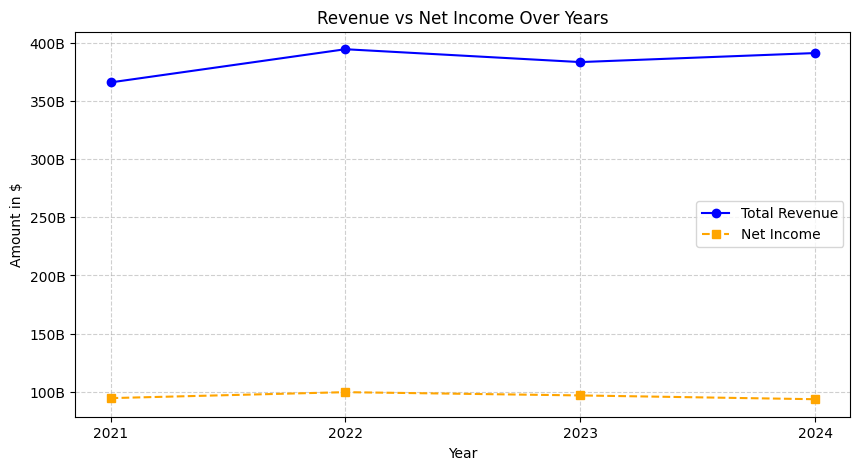

In [135]:
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 5))

# Plot revenue and net income
plt.plot(years, revenues, marker='o', label='Total Revenue', color='blue')
plt.plot(years, net_income, marker='s', linestyle='--', label='Net Income', color='orange')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Amount in $')
plt.title('Revenue vs Net Income Over Years')

# Format Y-axis to display values in billions
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e9:.0f}B'))

# Grid, legend, and display
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

### Insights from Revenue vs. Net Income Graph

**1. Revenue Trend**
- The total revenue shows a **general upward trend**, peaking in **2022**, followed by a slight dip in **2023**, and then recovering in **2024**.
- This suggests **strong business performance** with minor fluctuations.
- The small decline in 2023 might indicate external economic factors, operational inefficiencies, or increased costs.

**2. Net Income Trend**
- Net income remains **relatively stable** compared to revenue, showing only slight variations.
- This suggests that **profitability is consistent** despite revenue changes.
- The gap between revenue and net income indicates that **operating expenses, taxes, or other costs** play a significant role in determining net profit.

**3. Revenue vs. Net Income Scale Difference**
- Revenue is **significantly higher** than net income.
- This highlights that while the company generates **high revenue**, profitability is only a **fraction** of that.
- The trend could be influenced by factors like **cost of goods sold (COGS), operating expenses, and investments in growth**.




### Operating Cash Flow Trend (Bar Chart)

<ipython-input-3-aac085535d3c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=years, y=operating_cash_flow, palette="Blues")


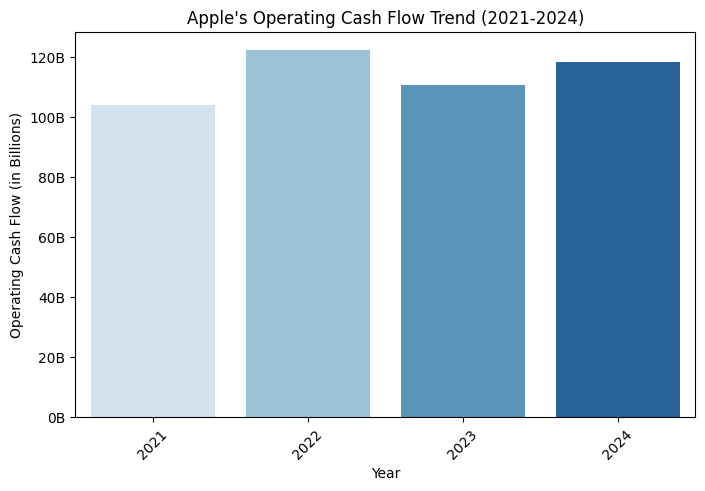

In [3]:
# Data
years = ["2021", "2022", "2023", "2024"]
operating_cash_flow = [104038000000, 122151000000, 110543000000, 118254000000]

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=years, y=operating_cash_flow, palette="Blues")

# Format Y-axis
plt.ylabel("Operating Cash Flow (in Billions)")
plt.xlabel("Year")
plt.title("Apple's Operating Cash Flow Trend (2021-2024)")
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')  # Avoid scientific notation
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e9:.0f}B'))  # Convert to billions

# Show plot
plt.show()

### Profitability Margins (Bar Chart)

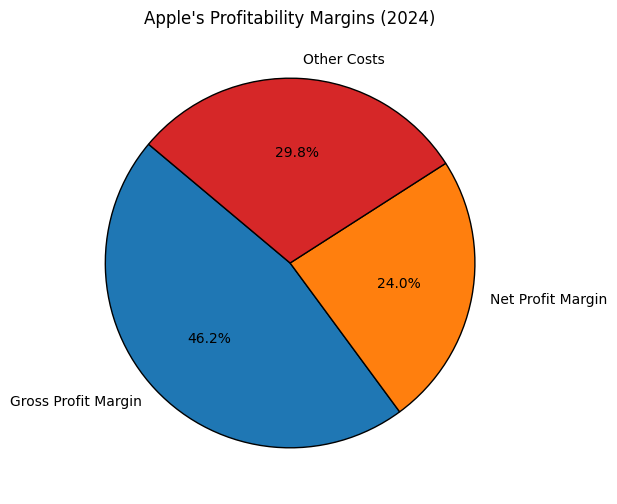

In [4]:
# Data
labels = ["Gross Profit Margin", "Net Profit Margin", "Other Costs"]
values = [46.21, 23.97, 100 - (46.21 + 23.97)]  # Remaining percentage as 'Other Costs'
colors = ["#1f77b4", "#ff7f0e", "#d62728"]  # Blue, Orange, Red

# Plot
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})

# Title
plt.title("Apple's Profitability Margins (2024)")

# Show plot
plt.show()

### Debt-to-Equity Ratio Trend (Line Chart)

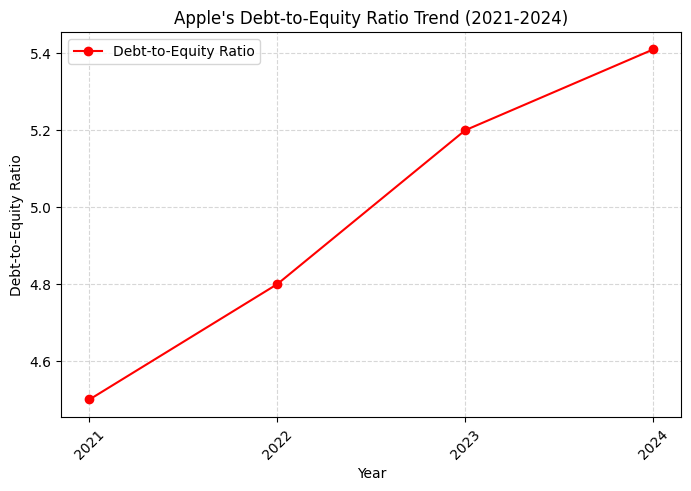

In [5]:
# Data
debt_to_equity = [4.5, 4.8, 5.2, 5.41]  # Replace with actual values

# Plot
plt.figure(figsize=(8, 5))
plt.plot(years, debt_to_equity, marker='o', linestyle='-', color='red', label="Debt-to-Equity Ratio")

# Labels and Formatting
plt.ylabel("Debt-to-Equity Ratio")
plt.xlabel("Year")
plt.title("Apple's Debt-to-Equity Ratio Trend (2021-2024)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.show()